# Exploratory Data Analysis

- [Accéder aux bases](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/)
- [Accéder à la documentation](https://www.data.gouv.fr/fr/datasets/r/8ef4c2a3-91a0-4d98-ae3a-989bde87b62a)

# Objectifs : prédire la gravité d'un accident

La gravité d'un accident est codé par la variable `grav`, présente (uniquement) dans la base _usagers_, qui peut prendre les valeurs suivantes :
- 1 : indemne ;
- 2 : tué ;
- 3 : blessé hospitalisé ;
- 4 : blessé léger.

On charge dans un premier temps tous les packages nécessaires.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sur data.gouv, quatre bases de données sont publiées annuellement. Elles concernent : les usages, les véhicules, les lieux et les caractéristiques. Nous chargeons ci-dessous les quatre bases de 2022 (les plus récentes).

In [2]:
df_usagers_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/62c20524-d442-46f5-bfd8-982c59763ec8", sep=";")
df_vehicules_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/c9742921-4427-41e5-81bc-f13af8bc31a0", sep=";")
df_lieux_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/a6ef711a-1f03-44cb-921a-0ce8ec975995", sep=";")
df_caracs_22 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/5fc299c0-4598-4c29-b74c-6a67b0cc27e7", sep=";")

c:\Users\nahta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Usagers

- 126 662 observations et 16 colonnes
- Quelques NaN, uniquement pour la variable `an_nais` (année de naissance)

La base est composée de variables essentiellement catégorielles.

In [3]:
df_usagers_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126662 entries, 0 to 126661
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      126662 non-null  int64  
 1   id_usager    126662 non-null  object 
 2   id_vehicule  126662 non-null  object 
 3   num_veh      126662 non-null  object 
 4   place        126662 non-null  int64  
 5   catu         126662 non-null  int64  
 6   grav         126662 non-null  int64  
 7   sexe         126662 non-null  int64  
 8   an_nais      123788 non-null  float64
 9   trajet       126662 non-null  int64  
 10  secu1        126662 non-null  int64  
 11  secu2        126662 non-null  int64  
 12  secu3        126662 non-null  int64  
 13  locp         126662 non-null  int64  
 14  actp         126662 non-null  object 
 15  etatp        126662 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.5+ MB


In [4]:
df_usagers_22["grav"].value_counts()

 1    53630
 4    49981
 3    19260
 2     3550
-1      241
Name: grav, dtype: int64

(On peut également obtenir le même résultat graphiquement.)

<AxesSubplot:xlabel='grav', ylabel='Count'>

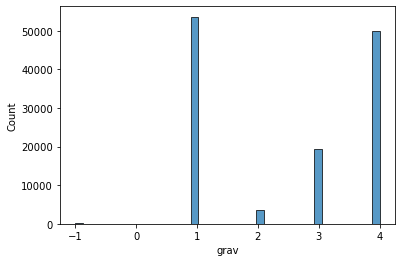

In [6]:
sns.histplot(data=df_usagers_22, x="grav")

Conclusion : il y a majoritairement des victimes indemmes et tuées, et peu de blessés (hospitalisés ou légers).

On note toutefois la présence (étrange, puisque non renseignée dans la documentation) de la valeur `-1`.